In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
data = pd.read_csv('day.csv')

In [4]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
data.shape

(730, 16)

In [7]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Start EDA

### 1. Null Value Treatment

In [8]:
# Checking the rows which have all the values as null:-

data.isna().any(axis = 0).sum()

# The above code will gives the value zero which means there are not any rows present which have all values as null

0

In [9]:
# Checking the columns which have all the values as null:-

data.isna().any(axis = 1).sum()

# The above code will gives the value zero which means there are not any columns present which have all values as null

0

In [10]:
# Checking the null values in columns:-

data.isnull().sum()

# The above code will gives the zero null value count for every column so that  we can say there are no any columns present with null Values.

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Type conversion of the Features

In [11]:
# Rename some columns for better understanding.
rename_columns = {'yr':'year','mnth':'month','hum':'humidity'}
data.rename(columns = rename_columns, inplace = True)

In [12]:
data

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [13]:
# Change the season column using this dictionary -> {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
data[['season']] = data[['season']].apply(lambda x : x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'}))

In [14]:
data

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,spring,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,spring,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,spring,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,spring,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [15]:
# Change weekday column using this dictionary {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
weekday_dct = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
data[['weekday']] = data[['weekday']].apply(lambda x : x.map(weekday_dct))

In [16]:
data

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,Saturday,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,Sunday,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,Monday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,Tuesday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,Wednesday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,spring,1,12,0,Thursday,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,spring,1,12,0,Friday,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,spring,1,12,0,Saturday,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,spring,1,12,0,Sunday,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [17]:
# Change weathersit column using this dictionary {1:'Clear', 2:'Mist + Cloudy', 3:'Light Snow', 4:'Snow + Fog'}
weathersit_dct = {1:'Clear', 2:'Mist + Cloudy', 3:'Light Snow', 4:'Snow + Fog'}
data[['weathersit']] = data[['weathersit']].apply(lambda x : x.map(weathersit_dct))

In [18]:
data

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,Saturday,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,Sunday,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,spring,1,12,0,Thursday,1,Mist + Cloudy,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,spring,1,12,0,Friday,1,Mist + Cloudy,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,spring,1,12,0,Saturday,0,Mist + Cloudy,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,spring,1,12,0,Sunday,0,Clear,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [19]:
data['year'].value_counts()

0    365
1    365
Name: year, dtype: int64

In [20]:
data['month'].value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: month, dtype: int64

In [21]:
# Change dteday column in the datetime format.
data['dteday'] = pd.to_datetime(data['dteday'])

In [22]:
# Change mnth column using this dteday column with the month names.
data['month'] = data['dteday'].dt.month_name()

In [23]:
data.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,January,0,Saturday,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,February,0,Sunday,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,March,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,April,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,May,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Delete Unwanted Columns

Now we have converted all the columns with the right format. Now our next step to delete unwanted data columns.
<br>
So We are deleting **instant**  column from our data as this shows only record number. We also going to delete **dteday** column from our data as this has date of the day.

In [24]:
drop_columns = ['instant', 'dteday', 'atemp', 'casual', 'registered']
data = data.drop(drop_columns, axis = 1)

### After the EDA process our dataframe has 730 rows and 15 columns with the right data format

In [25]:
data

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,cnt
0,spring,0,January,0,Saturday,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,February,0,Sunday,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,March,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,April,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,May,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,December,0,Thursday,1,Mist + Cloudy,10.420847,65.2917,23.458911,2114
726,spring,1,December,0,Friday,1,Mist + Cloudy,10.386653,59.0000,10.416557,3095
727,spring,1,December,0,Saturday,0,Mist + Cloudy,10.386653,75.2917,8.333661,1341
728,spring,1,December,0,Sunday,0,Clear,10.489153,48.3333,23.500518,1796


In [26]:
# Create a array of names of all the categorical variables and numerical_variables.
categorical_columns = [col_name for col_name in data.columns if len(set(data[col_name])) <= 12]
categorical_columns
numerical_columns = [col_name for col_name in data.columns if col_name not in categorical_columns]

### Data Visualization

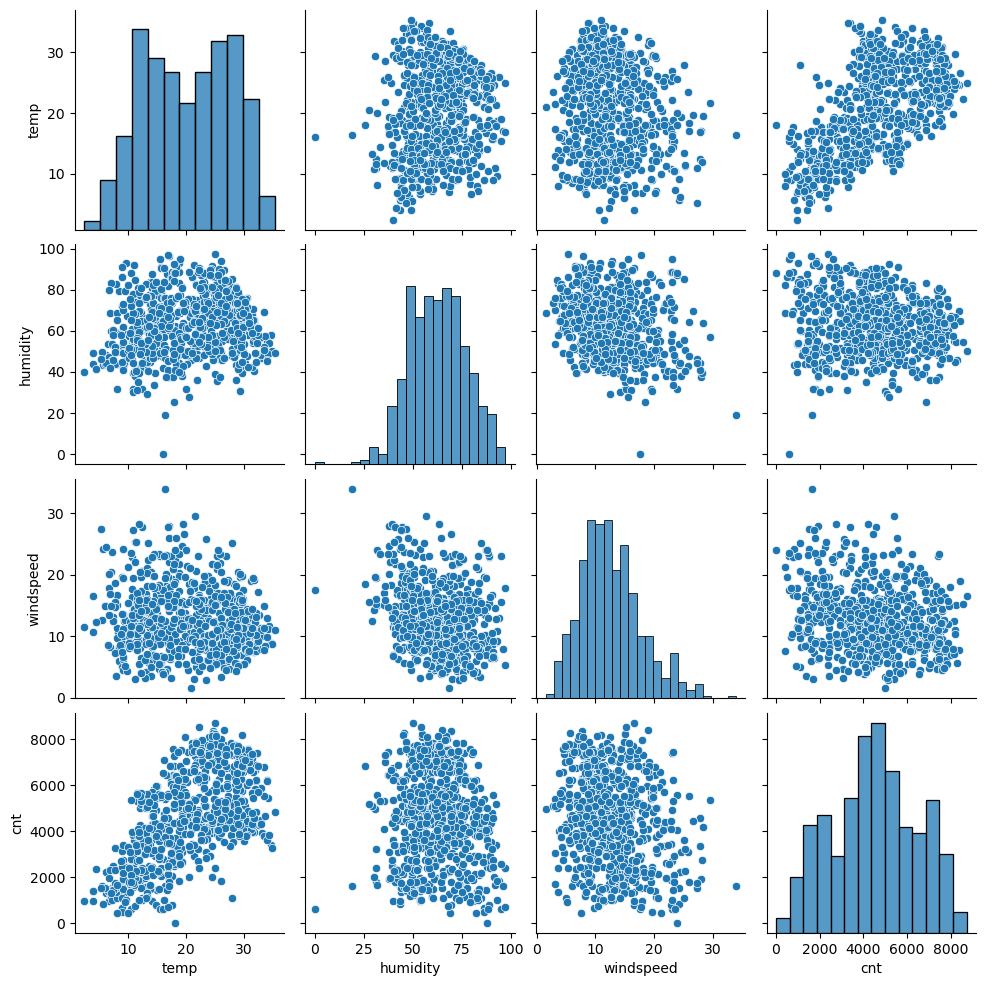

In [27]:
# Lets create pair plot to see the relation between all the nemerical_columns.
sns.pairplot(data[numerical_columns])
plt.show()

In [28]:
numerical_columns

['temp', 'humidity', 'windspeed', 'cnt']

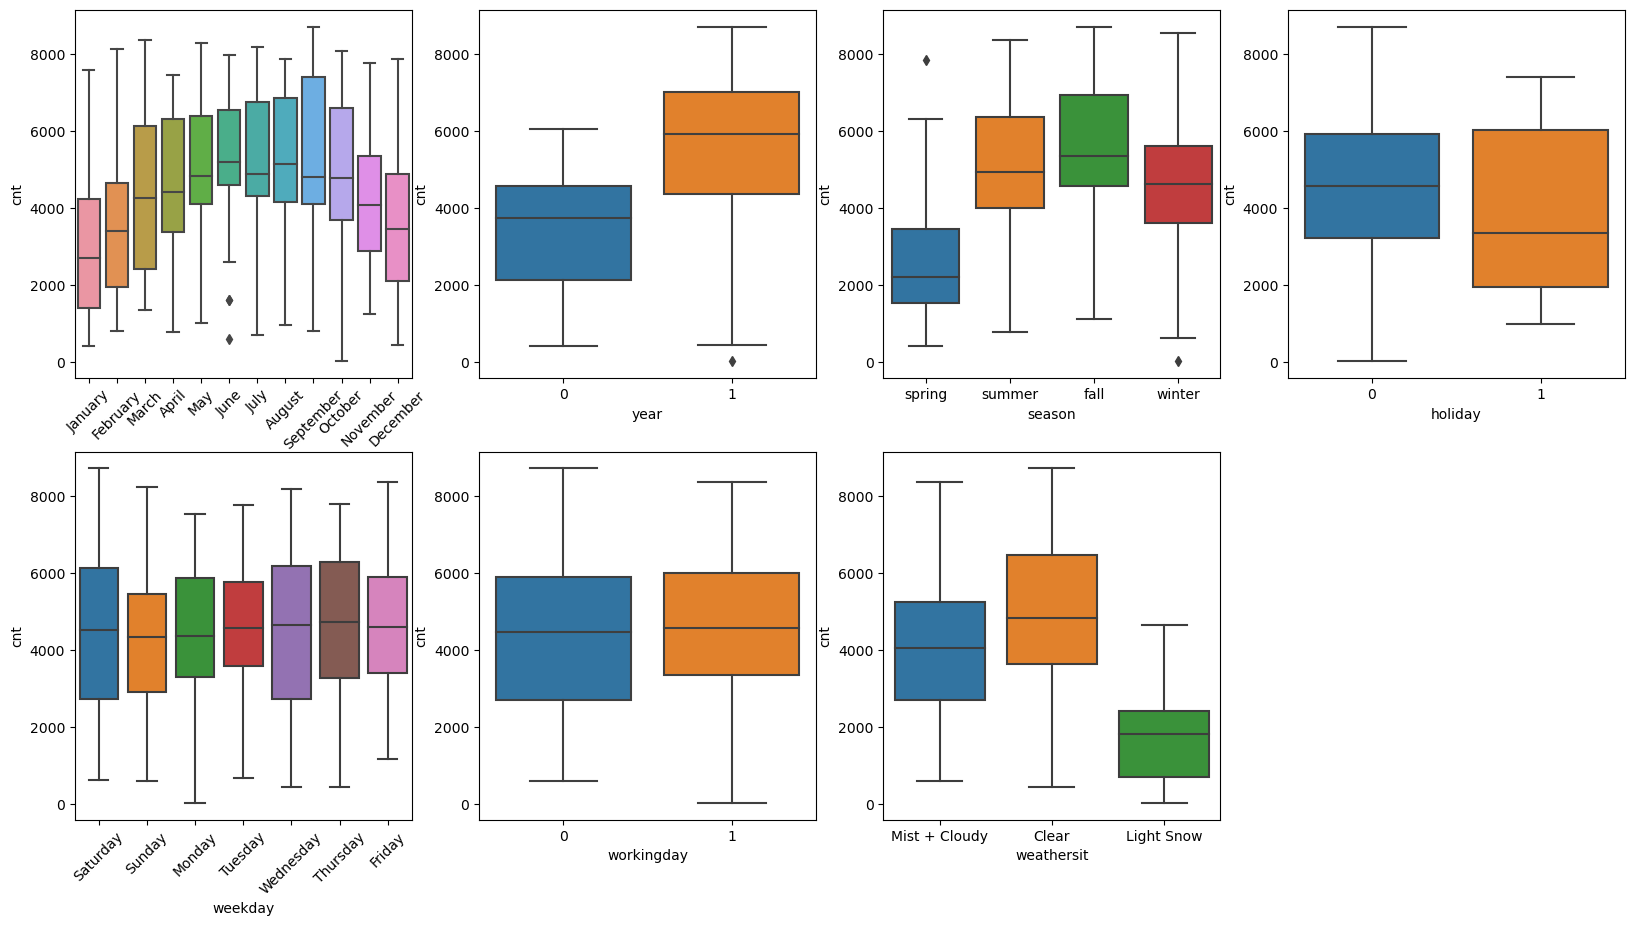

In [29]:
# Now lets create boxplot for all the categorical variables.

plt.figure(figsize=(20, 22))
plt.subplot(4, 4, 1)
sns.boxplot(data = data, x = 'month', y = 'cnt')
plt.xticks(rotation = 45)
plt.subplot(4, 4, 2)
sns.boxplot(data = data, x = 'year', y = 'cnt')
plt.subplot(4, 4, 3)
sns.boxplot(data = data, x = 'season', y = 'cnt')
plt.subplot(4, 4, 4)
sns.boxplot(data = data, x = 'holiday', y = 'cnt')
plt.subplot(4, 4, 5)
sns.boxplot(data = data, x = 'weekday', y = 'cnt')
plt.xticks(rotation = 45)
plt.subplot(4, 4, 6)
sns.boxplot(data = data, x = 'workingday', y = 'cnt')
plt.subplot(4, 4, 7)
sns.boxplot(data = data, x = 'weathersit', y = 'cnt')
plt.show()

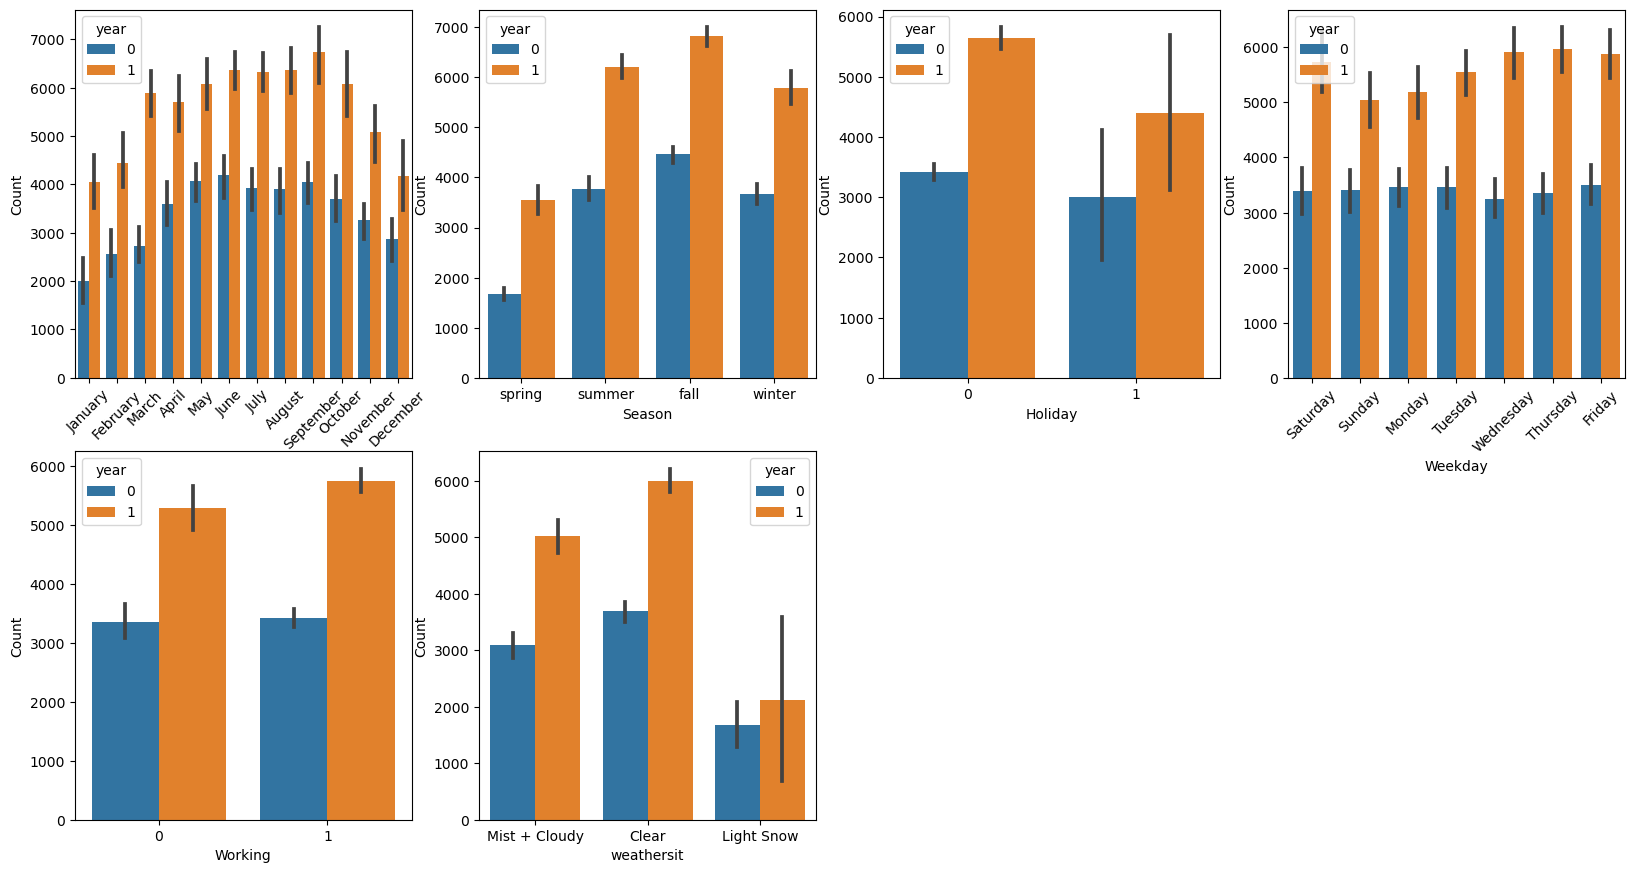

In [30]:
# Now lets create boxplot for all the categorical variables.

plt.figure(figsize=(20, 22))
plt.subplot(4, 4, 1)
sns.barplot(data = data, x = 'month', y = 'cnt', hue= 'year')
plt.xticks(rotation = 45)
plt.xlabel('Month')
plt.ylabel('Count')
plt.subplot(4, 4, 2)
sns.barplot(data = data, x = 'season', y = 'cnt', hue='year')
plt.xlabel('Season')
plt.ylabel('Count')
plt.subplot(4, 4, 3)
sns.barplot(data = data, x = 'holiday', y = 'cnt', hue='year')
plt.xlabel('Holiday')
plt.ylabel('Count')
plt.subplot(4, 4, 4)
sns.barplot(data = data, x = 'weekday', y = 'cnt', hue='year')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.subplot(4, 4, 5)
sns.barplot(data = data, x = 'workingday', y = 'cnt', hue='year')
plt.xlabel('Working')
plt.ylabel('Count')
plt.subplot(4, 4, 6)
sns.barplot(data = data, x = 'weathersit', y = 'cnt', hue='year')
plt.xlabel('weathersit')
plt.ylabel('Count')
plt.show()

## Observations from the above graphs :-

- Fall season seems to have attracted more booking. And, in each season the booking count has increased drastically from 2018 to 2019.
-  Most of the bookings has been done during the month of may, june, july, aug, sep and oct. Trend increased starting of the year till mid of the year and then it started decreasing as we approached the end of year.
- Clear weather attracted more booking which seems obvious.
- Thu, Fir, Sat and Wed have more number of bookings as compared to the start of the week.
- When it’s not holiday, booking seems to be less in number which seems reasonable as on holidays, people may want to spend time at home and enjoy with family.
- Booking seemed to be almost equal either on working day or non-working day in the year 2018 but in 2019 bookings is high on working day.
- 2019 attracted more number of booking from the previous year, which shows good progress in terms of business.

# Data Preprocessing

### Before Dummy data creation we first check which categorical column has binary type and which has non-binary type data.

There are a column **yr** in our data which have binary values but for this column we are perfoming dummy data creation method for batter understanding.

In [31]:
binary_columns = [col_name for col_name in categorical_columns if len(set(data[col_name])) <= 2]
non_binary_columns = [col_name for col_name in categorical_columns if col_name not in binary_columns]

## Dummy Data Creation

In [32]:
data_dummy = pd.get_dummies(data[non_binary_columns], drop_first=True)

In [33]:
# Add data_dummy in our main dataframe and use column wise concatination.

data = pd.concat([data, data_dummy], axis = 1)

In [34]:
data

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,...,month_October,month_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist + Cloudy
0,spring,0,January,0,Saturday,0,Mist + Cloudy,14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,February,0,Sunday,0,Mist + Cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,March,0,Monday,1,Clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,April,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,May,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,December,0,Thursday,1,Mist + Cloudy,10.420847,65.2917,23.458911,...,0,0,0,0,0,1,0,0,0,1
726,spring,1,December,0,Friday,1,Mist + Cloudy,10.386653,59.0000,10.416557,...,0,0,0,0,0,0,0,0,0,1
727,spring,1,December,0,Saturday,0,Mist + Cloudy,10.386653,75.2917,8.333661,...,0,0,0,1,0,0,0,0,0,1
728,spring,1,December,0,Sunday,0,Clear,10.489153,48.3333,23.500518,...,0,0,0,0,1,0,0,0,0,0


In [35]:
non_binary_columns

['season', 'month', 'weekday', 'weathersit']

In [36]:
data = data.drop(non_binary_columns, axis=1)

In [37]:
data

,year,holiday,workingday,temp,humidity,windspeed,cnt,season_spring,season_summer,season_winter,...,month_October,month_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist + Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,65.2917,23.458911,2114,1,0,0,...,0,0,0,0,0,1,0,0,0,1
726,1,0,1,10.386653,59.0000,10.416557,3095,1,0,0,...,0,0,0,0,0,0,0,0,0,1
727,1,0,0,10.386653,75.2917,8.333661,1341,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0


# Split the data into Train and Test set.
<br>
In this step we split our final Dataframe into Train and Test set. We use 70% of the data in Train set and 30% data for Test set.

In [38]:
bike_train, bike_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [39]:
bike_train.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,season_spring,season_summer,season_winter,...,month_October,month_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist + Cloudy
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [40]:
bike_test.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,season_spring,season_summer,season_winter,...,month_October,month_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist + Cloudy
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,19.270000,81.2917,13.250121,2659,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,...,1,0,0,0,0,0,0,1,0,0
152,0,0,1,29.315000,30.5000,19.583229,4968,0,1,0,...,0,0,0,0,0,1,0,0,0,0


# Scaling the data Using MinMaxScaler.

In [41]:
# Create a MinMaxScaler obhject.
scaler = MinMaxScaler()

# use fit_transform() method to scale the train set data. We are doing this scaling only for numeric variables.
bike_train[numerical_columns] = scaler.fit_transform(bike_train[numerical_columns])

# Training the Model

We are using the method where we train our model with all the features and then start removing features based on P value and VIF value.
<br>
Before Training the model we first create a heatmap of correlation values.


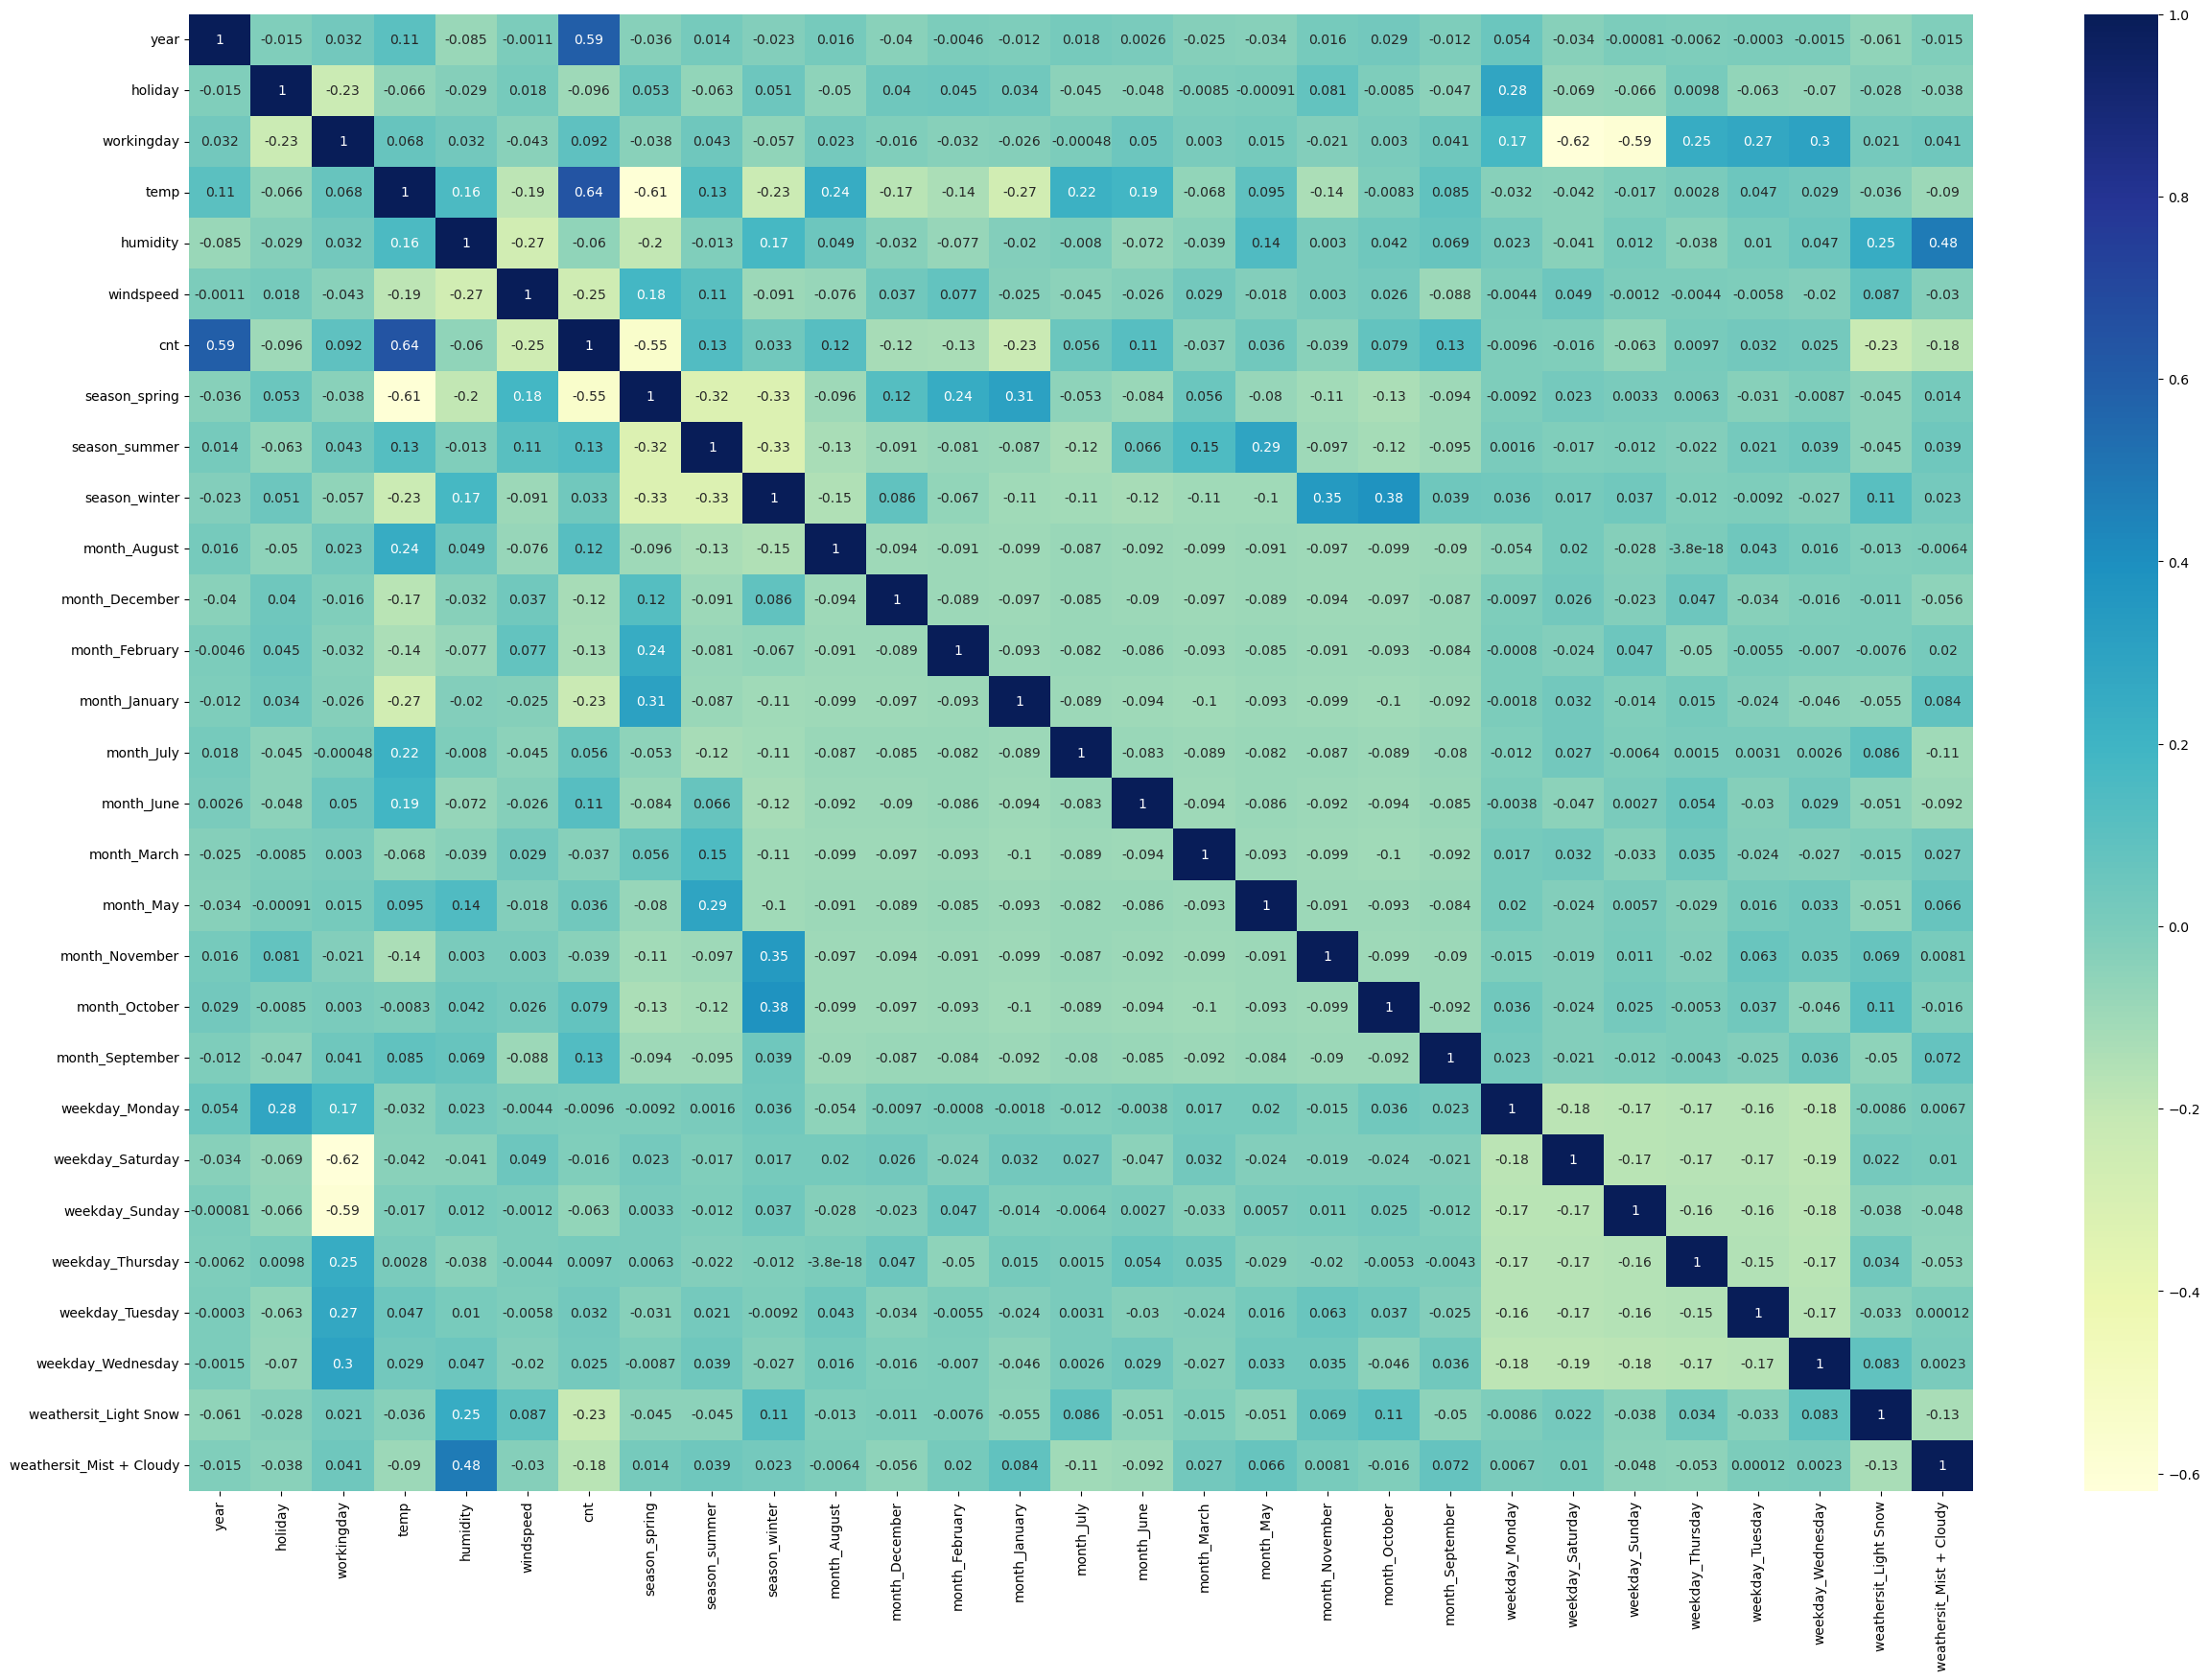

In [42]:
# Create heatmap of correlation values.
plt.figure(figsize = (30, 20))
sns.heatmap(bike_train.corr(), annot = True, cmap='YlGnBu')
plt.show()

## Building the model with all the features.


In [43]:
# Lets Split data into X_train and y_train.
y_train = bike_train.pop('cnt')
X_train = bike_train

In [44]:
def Create_linear_model(X_train):
  # Lets add Constent for X_train.
  X_train_sm = sm.add_constant(X_train)
  # Lets Create our model Now.
  lr = sm.OLS(y_train, X_train_sm)
  # Now Fit the model.
  lr_model = lr.fit()
  return lr_model, X_train_sm

In [45]:
# Create Linear model
lr_model1 , X_train_sm = Create_linear_model(X_train)

In [46]:
# Now Print the summary Statistics
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     96.73
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          1.52e-175
Time:                        23:02:14   Log-Likelihood:                 512.61
No. Observations:                 510   AIC:                            -969.2
Df Residuals:                     482   BIC:                            -850.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2250      0.031      7.209      0.000       0.164       0.286
year                         0.2325      0.008     28.170      0.000       0.216       0.249
holiday                      0.0120      0.024      0.503      0.615      -0.035       0.059
workingday                   0.0896      0.012      7.487      0.000       0.066       0.113
temp                         0.4892      0.035     13.967      0.000       0.420       0.558
humidity                    -0.1244      0.039     -3.212      0.001      -0.200      -0.048
windspeed                   -0.1824      0.026     -6.963      0.000      -0.234      -0.131
season_spring               -0.0714      0.021     -3.379      0.001      -0.113      -0.030
season_summer                0.0378      0.015      2.458      0.014       0.008       0.068
season_winter                0.0839      0.019      4.492      0.000       0.047       0.121
month_August                -0.0123      0.022     -0.556      0.578      -0.056       0.031
month_December              -0.0188      0.022     -0.871      0.384      -0.061       0.024
month_February              -0.0093      0.022     -0.425      0.671      -0.052       0.034
month_January               -0.0336      0.021     -1.569      0.117      -0.076       0.008
month_July                  -0.0484      0.023     -2.103      0.036      -0.094      -0.003
month_June                  -0.0169      0.021     -0.791      0.430      -0.059       0.025
month_March                  0.0066      0.020      0.327      0.744      -0.033       0.046
month_May                   -0.0084      0.021     -0.401      0.688      -0.050       0.033
month_November              -0.0260      0.022     -1.172      0.242      -0.070       0.018
month_October                0.0083      0.022      0.372      0.710      -0.036       0.052
month_September              0.0502      0.022      2.258      0.024       0.007       0.094
weekday_Monday              -0.0247      0.016     -1.561      0.119      -0.056       0.006
weekday_Saturday             0.0907      0.013      6.790      0.000       0.064       0.117
weekday_Sunday               0.0326      0.014      2.362      0.019       0.005       0.060
weekday_Thursday            -0.0078      0.016     -0.489      0.625      -0.039       0.024
weekday_Tuesday             -0.0173      0.016     -1.077      0.282      -0.049       0.014
weekday_Wednesday           -0.0035      0.015     -0.230      0.818      -0.034       0.027
weathersit_Light Snow       -0.2447      0.027     -8.997      0.000      -0.298      -0.191
weathersit_Mist + Cloudy    -0.0623      0.011     -5.770      0.000      -0.084      -0.041
==============================================================================
Omnibus:                    

### From the above model summary Statistics we canculde that our R2_value is 0.844. There are some features available which has very High P value.

<br>

### Let's Calculate VIF for all the features.


In [47]:
def Calculate_vif(data):
  vif = pd.DataFrame()
  vif['Features'] = data.columns
  vif['VIF'] = [variance_inflation_factor(data.values,  i) for i in range(data.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by='VIF', ascending=False)
  return vif


In [48]:
# Method to calculate P-value from the model.
def getPvalues(model, data):
  p_values_df = pd.DataFrame(columns = ['Features', 'P_value'])
  for feature in data.columns:
    p_val = round(model.pvalues[feature], 5)
    p_values_df = p_values_df.append({'Features':feature, 'P_value':p_val}, ignore_index = True)
  p_values_df = p_values_df.sort_values('P_value', ascending = False)
  return p_values_df

In [49]:
vif = Calculate_vif(X_train)
vif

,Features,VIF
2,workingday,64.48
21,weekday_Saturday,14.64
22,weekday_Sunday,13.91
6,season_spring,5.05
8,season_winter,4.01
3,temp,3.84
1,holiday,3.53
7,season_summer,2.69
18,month_October,2.57
17,month_November,2.43


### With the P Value summary and VIF data there are some column which have high p value or high VIF values.
<br>
We have some feature which have high P-value(>0.05) and low VIF (<=5) and Some Features have low p value(<=0.05) and High VIF(>5).
Now in that situation we first remove features which fall under the category High P-value - Low VIF.
So we have **weekday_Wednesday** feature which have highest P-value as 0.818 but Low VIF 1.94. So we are going to delete this feature first and then check again P-value and VIF.

In [50]:
# Drop weekday_Wednesday Feature...
X_train = X_train.drop('weekday_Wednesday', axis = 1)

:Now lets create model once again with the new data check the P-value and VIF

In [51]:
# Create Model
lr_model2 , X_train_sm = Create_linear_model(X_train)
# Create VIF data for new data
vif = Calculate_vif(X_train)

In [52]:
lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     100.7
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          1.54e-176
Time:                        23:02:14   Log-Likelihood:                 512.58
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     483   BIC:                            -856.8
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2246      0.031      7.214      0.000       0.163       0.286
year                         0.2324      0.008     28.198      0.000       0.216       0.249
holiday                      0.0110      0.023      0.470      0.638      -0.035       0.057
workingday                   0.0885      0.011      8.094      0.000       0.067       0.110
temp                         0.4891      0.035     13.980      0.000       0.420       0.558
humidity                    -0.1247      0.039     -3.228      0.001      -0.201      -0.049
windspeed                   -0.1824      0.026     -6.970      0.000      -0.234      -0.131
season_spring               -0.0716      0.021     -3.393      0.001      -0.113      -0.030
season_summer                0.0376      0.015      2.452      0.015       0.007       0.068
season_winter                0.0838      0.019      4.493      0.000       0.047       0.120
month_August                -0.0125      0.022     -0.565      0.572      -0.056       0.031
month_December              -0.0188      0.022     -0.873      0.383      -0.061       0.024
month_February              -0.0093      0.022     -0.424      0.671      -0.052       0.034
month_January               -0.0336      0.021     -1.568      0.118      -0.076       0.008
month_July                  -0.0485      0.023     -2.113      0.035      -0.094      -0.003
month_June                  -0.0171      0.021     -0.801      0.424      -0.059       0.025
month_March                  0.0066      0.020      0.325      0.745      -0.033       0.046
month_May                   -0.0086      0.021     -0.410      0.682      -0.050       0.033
month_November              -0.0263      0.022     -1.188      0.235      -0.070       0.017
month_October                0.0083      0.022      0.371      0.711      -0.036       0.052
month_September              0.0500      0.022      2.253      0.025       0.006       0.094
weekday_Monday              -0.0227      0.013     -1.704      0.089      -0.049       0.003
weekday_Saturday             0.0916      0.013      7.128      0.000       0.066       0.117
weekday_Sunday               0.0335      0.013      2.518      0.012       0.007       0.060
weekday_Thursday            -0.0058      0.013     -0.433      0.665      -0.032       0.021
weekday_Tuesday             -0.0153      0.014     -1.130      0.259      -0.042       0.011
weathersit_Light Snow       -0.2451      0.027     -9.040      0.000      -0.298      -0.192
weathersit_Mist + Cloudy    -0.0622      0.011     -5.773      0.000      -0.083      -0.041
==============================================================================
Omnibus:                       81.169   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Ja

In [53]:
p_values = getPvalues(lr_model2, X_train)

In [54]:
vif

,Features,VIF
2,workingday,62.68
21,weekday_Saturday,14.61
22,weekday_Sunday,13.88
6,season_spring,5.04
8,season_winter,4.01
3,temp,3.84
1,holiday,3.47
7,season_summer,2.68
18,month_October,2.57
9,month_August,2.42


So we have **month_March** feature which have highest P-value as 0.74495 but Low VIF 2.09. So we are going to delete this feature first and then check again P-value and VIF.

In [55]:
# deleting the feature month_March
X_train = X_train.drop('month_March', axis = 1)

:Now lets create model once again with the new data check the P-value and VIF

In [56]:
# Create Model
lr_model3 , X_train_sm = Create_linear_model(X_train)
# Create VIF data for new data
vif = Calculate_vif(X_train)
# Create P_value data
p_values = getPvalues(lr_model3, X_train)

In [57]:
lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     104.9
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          1.56e-177
Time:                        23:02:15   Log-Likelihood:                 512.53
No. Observations:                 510   AIC:                            -973.1
Df Residuals:                     484   BIC:                            -863.0
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2275      0.030      7.630      0.000       0.169       0.286
year                         0.2323      0.008     28.244      0.000       0.216       0.248
holiday                      0.0116      0.023      0.496      0.620      -0.034       0.057
workingday                   0.0893      0.011      8.378      0.000       0.068       0.110
temp                         0.4896      0.035     14.016      0.000       0.421       0.558
humidity                    -0.1249      0.039     -3.234      0.001      -0.201      -0.049
windspeed                   -0.1829      0.026     -7.006      0.000      -0.234      -0.132
season_spring               -0.0711      0.021     -3.382      0.001      -0.112      -0.030
season_summer                0.0373      0.015      2.437      0.015       0.007       0.067
season_winter                0.0840      0.019      4.512      0.000       0.047       0.121
month_August                -0.0163      0.019     -0.873      0.383      -0.053       0.020
month_December              -0.0227      0.018     -1.266      0.206      -0.058       0.013
month_February              -0.0132      0.018     -0.719      0.472      -0.049       0.023
month_January               -0.0375      0.018     -2.127      0.034      -0.072      -0.003
month_July                  -0.0524      0.020     -2.663      0.008      -0.091      -0.014
month_June                  -0.0208      0.018     -1.155      0.249      -0.056       0.015
month_May                   -0.0122      0.018     -0.682      0.495      -0.047       0.023
month_November              -0.0301      0.019     -1.602      0.110      -0.067       0.007
month_October                0.0044      0.019      0.234      0.815      -0.033       0.042
month_September              0.0461      0.019      2.458      0.014       0.009       0.083
weekday_Monday              -0.0226      0.013     -1.698      0.090      -0.049       0.004
weekday_Saturday             0.0924      0.013      7.353      0.000       0.068       0.117
weekday_Sunday               0.0342      0.013      2.605      0.009       0.008       0.060
weekday_Thursday            -0.0056      0.013     -0.416      0.677      -0.032       0.021
weekday_Tuesday             -0.0152      0.014     -1.125      0.261      -0.042       0.011
weathersit_Light Snow       -0.2451      0.027     -9.048      0.000      -0.298      -0.192
weathersit_Mist + Cloudy    -0.0621      0.011     -5.772      0.000      -0.083      -0.041
==============================================================================
Omnibus:                       80.665   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.954
Skew:                          -0.809   Prob(JB):       

In [58]:
p_values

,Features,P_value
17,month_October,0.81495
22,weekday_Thursday,0.67737
1,holiday,0.61978
15,month_May,0.49550
11,month_February,0.47242
9,month_August,0.38289
23,weekday_Tuesday,0.26102
14,month_June,0.24873
10,month_December,0.20599
16,month_November,0.10977


In [59]:
vif

,Features,VIF
2,workingday,57.39
20,weekday_Saturday,13.35
21,weekday_Sunday,12.82
6,season_spring,5.02
8,season_winter,4.00
3,temp,3.83
1,holiday,3.30
7,season_summer,2.67
4,humidity,1.95
17,month_October,1.85


So we have **month_October** feature which have highest P-value as 0.81495 but Low VIF 1.85. So we are going to delete this feature first and then check again P-value and VIF.

In [60]:
# deleting the feature month_March
X_train = X_train.drop('month_October', axis = 1)

:Now lets create model once again with the new data check the P-value and VIF

In [61]:
# Create Model
lr_model4 , X_train_sm = Create_linear_model(X_train)
# Create VIF data for new data
vif = Calculate_vif(X_train)
# Create P_value data
p_values = getPvalues(lr_model4, X_train)

In [62]:
p_values

,Features,P_value
21,weekday_Thursday,0.67848
1,holiday,0.61889
15,month_May,0.43217
11,month_February,0.39244
9,month_August,0.31158
22,weekday_Tuesday,0.26576
14,month_June,0.19084
10,month_December,0.13904
18,weekday_Monday,0.09087
16,month_November,0.05168


In [63]:
vif

,Features,VIF
2,workingday,57.05
19,weekday_Saturday,13.30
20,weekday_Sunday,12.73
6,season_spring,4.98
3,temp,3.74
8,season_winter,3.61
1,holiday,3.29
7,season_summer,2.65
4,humidity,1.95
24,weathersit_Mist + Cloudy,1.61


So we have **weekday_Thursday** feature which have highest P-value as 0.67848 but Low VIF 1.29. So we are going to delete this feature first and then check again P-value and VIF.

In [64]:
# deleting the feature month_March
X_train = X_train.drop('weekday_Thursday', axis = 1)

:Now lets create model once again with the new data check the P-value and VIF

In [65]:
# Create Model
lr_model5 , X_train_sm = Create_linear_model(X_train)
# Create VIF data for new data
vif = Calculate_vif(X_train)
# Create P_value data
p_values = getPvalues(lr_model5, X_train)

In [66]:
p_values

,Features,P_value
1,holiday,0.66181
15,month_May,0.43480
11,month_February,0.40275
9,month_August,0.31363
21,weekday_Tuesday,0.30003
14,month_June,0.18743
10,month_December,0.13679
18,weekday_Monday,0.09930
16,month_November,0.05264
12,month_January,0.02019


In [67]:
vif

,Features,VIF
2,workingday,55.85
19,weekday_Saturday,13.29
20,weekday_Sunday,12.72
6,season_spring,4.97
3,temp,3.73
8,season_winter,3.61
1,holiday,3.22
7,season_summer,2.65
4,humidity,1.95
23,weathersit_Mist + Cloudy,1.60


So we have **holiday** feature which have highest P-value as 0.66181 but Low VIF 3.22. So we are going to delete this feature first and then check again P-value and VIF.

In [68]:
# deleting the feature month_March
X_train = X_train.drop('holiday', axis = 1)

:Now lets create model once again with the new data check the P-value and VIF

In [69]:
# Create Model
lr_model6 , X_train_sm = Create_linear_model(X_train)
# Create VIF data for new data
vif = Calculate_vif(X_train)
# Create P_value data
p_values = getPvalues(lr_model6, X_train)

In [70]:
p_values

,Features,P_value
14,month_May,0.43480
10,month_February,0.40275
19,weekday_Sunday,0.39286
8,month_August,0.31363
20,weekday_Tuesday,0.30003
13,month_June,0.18743
9,month_December,0.13679
17,weekday_Monday,0.09930
15,month_November,0.05264
11,month_January,0.02019


In [71]:
vif

,Features,VIF
3,humidity,33.50
1,workingday,19.94
2,temp,19.04
18,weekday_Saturday,5.49
19,weekday_Sunday,5.27
4,windspeed,4.98
5,season_spring,4.97
7,season_winter,3.98
6,season_summer,3.04
22,weathersit_Mist + Cloudy,2.36


So we have **month_May** feature which have highest P-value as 0.43480 but Low VIF 1.41. So we are going to delete this feature first and then check again P-value and VIF.

In [72]:
# deleting the feature month_March
X_train = X_train.drop('month_May', axis = 1)

:Now lets create model once again with the new data check the P-value and VIF

In [73]:
# Create Model
lr_model7 , X_train_sm = Create_linear_model(X_train)
# Create VIF data for new data
vif = Calculate_vif(X_train)
# Create P_value data
p_values = getPvalues(lr_model7, X_train)

In [74]:
p_values

,Features,P_value
10,month_February,0.48658
8,month_August,0.38889
18,weekday_Sunday,0.38812
19,weekday_Tuesday,0.30012
13,month_June,0.24312
9,month_December,0.17307
16,weekday_Monday,0.09877
14,month_November,0.06607
11,month_January,0.02709
6,season_summer,0.01860


In [75]:
vif

,Features,VIF
3,humidity,32.85
1,workingday,19.91
2,temp,18.93
17,weekday_Saturday,5.48
18,weekday_Sunday,5.26
4,windspeed,4.98
5,season_spring,4.95
7,season_winter,3.98
6,season_summer,2.99
21,weathersit_Mist + Cloudy,2.36


So we have **month_February** feature which have highest P-value as 0.48658 but Low VIF 1.35. So we are going to delete this feature first and then check again P-value and VIF.

In [76]:
# deleting the feature month_March
X_train = X_train.drop('month_February', axis = 1)

:Now lets create model once again with the new data check the P-value and VIF

In [77]:
# Create Model
lr_model8 , X_train_sm = Create_linear_model(X_train)
# Create VIF data for new data
vif = Calculate_vif(X_train)
# Create P_value data
p_values = getPvalues(lr_model8, X_train)

In [78]:
p_values

,Features,P_value
8,month_August,0.46386
17,weekday_Sunday,0.38105
18,weekday_Tuesday,0.29941
12,month_June,0.29168
9,month_December,0.21820
15,weekday_Monday,0.10124
13,month_November,0.08207
10,month_January,0.03563
6,season_summer,0.01401
11,month_July,0.00628


In [79]:
vif

,Features,VIF
3,humidity,32.85
1,workingday,19.86
2,temp,18.84
16,weekday_Saturday,5.47
17,weekday_Sunday,5.24
4,windspeed,4.97
5,season_spring,4.80
7,season_winter,3.98
6,season_summer,2.97
20,weathersit_Mist + Cloudy,2.36


So we have **month_August** feature which have highest P-value as 0.46386 but Low VIF 1.51. So we are going to delete this feature first and then check again P-value and VIF.

In [80]:
# deleting the feature month_March
X_train = X_train.drop('month_August', axis = 1)

:Now lets create model once again with the new data check the P-value and VIF

In [81]:
# Create Model
lr_model9 , X_train_sm = Create_linear_model(X_train)
# Create VIF data for new data
vif = Calculate_vif(X_train)
# Create P_value data
p_values = getPvalues(lr_model9, X_train)

In [82]:
p_values

,Features,P_value
16,weekday_Sunday,0.39230
11,month_June,0.36784
17,weekday_Tuesday,0.29412
8,month_December,0.25919
14,weekday_Monday,0.10641
12,month_November,0.09772
9,month_January,0.04494
10,month_July,0.00833
15,weekday_Saturday,0.00441
1,workingday,0.00381


In [83]:
vif

,Features,VIF
3,humidity,32.48
1,workingday,19.42
2,temp,18.81
15,weekday_Saturday,5.35
16,weekday_Sunday,5.17
4,windspeed,4.97
5,season_spring,4.62
7,season_winter,3.69
6,season_summer,2.60
19,weathersit_Mist + Cloudy,2.35


So we have **weekday_Sunday** feature which have highest P-value as 0.39230 and high VIF 5.17. So we are going to delete this feature first and then check again P-value and VIF.

In [84]:
# deleting the feature month_March
X_train = X_train.drop('weekday_Sunday', axis = 1)

:Now lets create model once again with the new data check the P-value and VIF

In [85]:
# Create Model
lr_model10 , X_train_sm = Create_linear_model(X_train)
# Create VIF data for new data
vif = Calculate_vif(X_train)
# Create P_value data
p_values = getPvalues(lr_model10, X_train)

In [86]:
p_values

,Features,P_value
11,month_June,0.38295
16,weekday_Tuesday,0.26519
8,month_December,0.24221
12,month_November,0.08488
14,weekday_Monday,0.04371
9,month_January,0.04195
10,month_July,0.00910
6,season_summer,0.00308
13,month_September,0.00093
3,humidity,0.00076


In [87]:
vif

,Features,VIF
3,humidity,28.35
2,temp,16.46
1,workingday,5.11
4,windspeed,4.72
5,season_spring,4.00
7,season_winter,3.37
6,season_summer,2.40
18,weathersit_Mist + Cloudy,2.32
0,year,2.09
15,weekday_Saturday,1.86


So we have **month_June** feature which have highest P-value as 0.38295 and Low VIF 1.21. So we are going to delete this feature first and then check again P-value and VIF.

In [88]:
# deleting the feature month_March
X_train = X_train.drop('month_June', axis = 1)

:Now lets create model once again with the new data check the P-value and VIF

In [89]:
# Create Model
lr_model11 , X_train_sm = Create_linear_model(X_train)
# Create VIF data for new data
vif = Calculate_vif(X_train)
# Create P_value data
p_values = getPvalues(lr_model11, X_train)

In [90]:
p_values

,Features,P_value
15,weekday_Tuesday,0.28686
8,month_December,0.28002
11,month_November,0.09847
9,month_January,0.05033
13,weekday_Monday,0.04516
10,month_July,0.01248
6,season_summer,0.00277
3,humidity,0.00087
5,season_spring,0.00061
12,month_September,0.00052


In [91]:
vif

,Features,VIF
3,humidity,28.34
2,temp,16.10
1,workingday,5.09
4,windspeed,4.72
5,season_spring,3.99
7,season_winter,3.37
6,season_summer,2.40
17,weathersit_Mist + Cloudy,2.31
0,year,2.09
14,weekday_Saturday,1.86


So we have **weekday_Tuesday** feature which have highest P-value as 0.28686 and Low VIF 1.32. So we are going to delete this feature first and then check again P-value and VIF.

In [92]:
# deleting the feature month_March
X_train = X_train.drop('weekday_Tuesday', axis = 1)

:Now lets create model once again with the new data check the P-value and VIF

In [93]:
# Create Model
lr_model12 , X_train_sm = Create_linear_model(X_train)
# Create VIF data for new data
vif = Calculate_vif(X_train)
# Create P_value data
p_values = getPvalues(lr_model12, X_train)

In [94]:
p_values

,Features,P_value
8,month_December,0.29368
11,month_November,0.08484
13,weekday_Monday,0.06991
9,month_January,0.05145
10,month_July,0.01241
6,season_summer,0.00286
3,humidity,0.00077
5,season_spring,0.00059
12,month_September,0.00046
14,weekday_Saturday,0.00002


In [95]:
vif

,Features,VIF
3,humidity,28.33
2,temp,16.10
1,workingday,4.79
4,windspeed,4.72
5,season_spring,3.99
7,season_winter,3.37
6,season_summer,2.40
16,weathersit_Mist + Cloudy,2.31
0,year,2.09
14,weekday_Saturday,1.86


So we have **month_December** feature which have highest P-value as 0.29368 and Low VIF 1.22. So we are going to delete this feature first and then check again P-value and VIF.

In [96]:
# deleting the feature month_March
X_train = X_train.drop('month_December', axis = 1)

:Now lets create model once again with the new data check the P-value and VIF

In [97]:
# Create Model
lr_model13 , X_train_sm = Create_linear_model(X_train)
# Create VIF data for new data
vif = Calculate_vif(X_train)
# Create P_value data
p_values = getPvalues(lr_model13, X_train)

In [98]:
p_values

,Features,P_value
10,month_November,0.11722
8,month_January,0.07400
12,weekday_Monday,0.07294
9,month_July,0.01585
6,season_summer,0.00220
3,humidity,0.00066
5,season_spring,0.00056
11,month_September,0.00026
13,weekday_Saturday,0.00002
0,year,0.00000


In [99]:
vif

,Features,VIF
3,humidity,28.04
2,temp,16.02
1,workingday,4.78
4,windspeed,4.71
5,season_spring,3.97
7,season_winter,3.34
6,season_summer,2.39
15,weathersit_Mist + Cloudy,2.29
0,year,2.09
13,weekday_Saturday,1.86


So we have **month_November** feature which have highest P-value as 0.11722 and Low VIF 1.28. So we are going to delete this feature first and then check again P-value and VIF.

In [100]:
# deleting the feature month_March
X_train = X_train.drop('month_November', axis = 1)

:Now lets create model once again with the new data check the P-value and VIF

In [101]:
# Create Model
lr_model14 , X_train_sm = Create_linear_model(X_train)
# Create VIF data for new data
vif = Calculate_vif(X_train)
# Create P_value data
p_values = getPvalues(lr_model14, X_train)

In [102]:
p_values

,Features,P_value
8,month_January,0.10015
11,weekday_Monday,0.08233
9,month_July,0.02071
6,season_summer,0.00163
3,humidity,0.00090
5,season_spring,0.00085
10,month_September,0.00011
12,weekday_Saturday,0.00002
0,year,0.00000
1,workingday,0.00000


In [103]:
vif

,Features,VIF
3,humidity,28.03
2,temp,16.02
1,workingday,4.78
4,windspeed,4.70
5,season_spring,3.97
7,season_winter,3.16
6,season_summer,2.39
14,weathersit_Mist + Cloudy,2.29
0,year,2.09
12,weekday_Saturday,1.86


So we have **month_January** feature which have highest P-value as 0.10015 and Low VIF 1.26. So we are going to delete this feature first and then check again P-value and VIF.

In [104]:
# deleting the feature month_March
X_train = X_train.drop('month_January', axis = 1)

:Now lets create model once again with the new data check the P-value and VIF

In [105]:
# Create Model
lr_model15 , X_train_sm = Create_linear_model(X_train)
# Create VIF data for new data
vif = Calculate_vif(X_train)
# Create P_value data
p_values = getPvalues(lr_model15, X_train)

In [106]:
p_values

,Features,P_value
10,weekday_Monday,0.08260
8,month_July,0.02770
6,season_summer,0.00103
3,humidity,0.00076
5,season_spring,0.00071
9,month_September,0.00006
11,weekday_Saturday,0.00002
0,year,0.00000
1,workingday,0.00000
2,temp,0.00000


In [107]:
vif

,Features,VIF
3,humidity,27.64
2,temp,15.88
1,workingday,4.77
4,windspeed,4.69
5,season_spring,3.90
7,season_winter,3.15
6,season_summer,2.39
13,weathersit_Mist + Cloudy,2.29
0,year,2.09
11,weekday_Saturday,1.85


So we have **weekday_Monday** feature which have highest P-value as 0.08260 and Low VIF 1.23. So we are going to delete this feature first and then check again P-value and VIF.

In [108]:
# deleting the feature month_March
X_train = X_train.drop('weekday_Monday', axis = 1)

:Now lets create model once again with the new data check the P-value and VIF

In [109]:
# Create Model
lr_model16 , X_train_sm = Create_linear_model(X_train)
# Create VIF data for new data
vif = Calculate_vif(X_train)
# Create P_value data
p_values = getPvalues(lr_model16, X_train)

In [110]:
p_values

,Features,P_value
8,month_July,0.02713
6,season_summer,0.00103
5,season_spring,0.00084
3,humidity,0.00062
9,month_September,0.00007
10,weekday_Saturday,0.00001
0,year,0.00000
1,workingday,0.00000
2,temp,0.00000
4,windspeed,0.00000


In [111]:
vif

,Features,VIF
3,humidity,27.54
2,temp,15.86
1,workingday,4.72
4,windspeed,4.69
5,season_spring,3.90
7,season_winter,3.15
6,season_summer,2.39
12,weathersit_Mist + Cloudy,2.29
0,year,2.08
10,weekday_Saturday,1.84


Now our High P-value & Low VIF type of features gets resolved. Now the Highest P-value is 0.027 which is for **month_July**.
Now we start Removing Low P-value & High VIF type of Features.
<br>
So we have **humidity** feature who have Highest VIF 27.54 and Low P-value 0.00064.
<br>
So we are going to delete this feature first and then check again P-value and VIF

In [112]:
# deleting the feature month_March
X_train = X_train.drop('humidity', axis = 1)

:Now lets create model once again with the new data check the P-value and VIF

In [113]:
# Create Model
lr_model17 , X_train_sm = Create_linear_model(X_train)
# Create VIF data for new data
vif = Calculate_vif(X_train)
# Create P_value data
p_values = getPvalues(lr_model17, X_train)

In [114]:
lr_model17.params

const                       0.162232
year                        0.234889
workingday                  0.054537
temp                        0.477782
windspeed                  -0.152657
season_spring              -0.075182
season_summer               0.040964
season_winter               0.077905
month_July                 -0.036158
month_September             0.061773
weekday_Saturday            0.067539
weathersit_Light Snow      -0.274682
weathersit_Mist + Cloudy   -0.082073
dtype: float64

In [115]:
lr_model17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.0
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          3.08e-186
Time:                        23:02:18   Log-Likelihood:                 499.37
No. Observations:                 510   AIC:                            -972.7
Df Residuals:                     497   BIC:                            -917.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1622      0.030      5.327      0.000       0.102       0.222
year                         0.2349      0.008     28.506      0.000       0.219       0.251
workingday                   0.0545      0.011      4.876      0.000       0.033       0.077
temp                         0.4778      0.033     14.508      0.000       0.413       0.542
windspeed                   -0.1527      0.025     -6.072      0.000      -0.202      -0.103
season_spring               -0.0752      0.020     -3.702      0.000      -0.115      -0.035
season_summer                0.0410      0.014      2.945      0.003       0.014       0.068
season_winter                0.0779      0.016      4.740      0.000       0.046       0.110
month_July                  -0.0362      0.017     -2.167      0.031      -0.069      -0.003
month_September              0.0618      0.016      3.912      0.000       0.031       0.093
weekday_Saturday             0.0675      0.014      4.688      0.000       0.039       0.096
weathersit_Light Snow       -0.2747      0.025    -11.053      0.000      -0.324      -0.226
weathersit_Mist + Cloudy    -0.0821      0.009     -9.341      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       78.549   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.432
Skew:                          -0.774   Prob(JB):                     1.10e-44
Kurtosis:                       5.670   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
p_values

,Features,P_value
7,month_July,0.03071
5,season_summer,0.00338
4,season_spring,0.00024
8,month_September,0.00010
0,year,0.00000
1,workingday,0.00000
2,temp,0.00000
3,windspeed,0.00000
6,season_winter,0.00000
9,weekday_Saturday,0.00000


In [117]:
vif

,Features,VIF
2,temp,5.64
1,workingday,4.66
3,windspeed,4.63
4,season_spring,2.26
0,year,2.07
5,season_summer,1.96
9,weekday_Saturday,1.83
6,season_winter,1.78
11,weathersit_Mist + Cloudy,1.56
7,month_July,1.21


Now here we have VIF for **temp** Feature is 5.64 and P-value is nearly zero. Now Lets try to delete the **temp** Feature and lets check what is the effect is on our model.

Now lets create model once again with the new data check the P-value and VIF

In [118]:
# deleting the feature month_March
X_train_1 = X_train.drop('temp', axis = 1)
# Lets add Constent for X_train.
X_train_sm1 = sm.add_constant(X_train_1)
# Lets Create our model Now.
lr_model18 = sm.OLS(y_train, X_train_sm1)
# Now Fit the model.
lr_model18 = lr_model18.fit()

In [119]:
# Create VIF data for new data
vif = Calculate_vif(X_train_1)
# Create P_value data
p_values = getPvalues(lr_model18, X_train_1)

In [120]:
lr_model18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     148.5
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          2.07e-149
Time:                        23:02:18   Log-Likelihood:                 409.32
No. Observations:                 510   AIC:                            -794.6
Df Residuals:                     498   BIC:                            -743.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.5438      0.018     29.692      0.000       0.508       0.580
year                         0.2479      0.010     25.389      0.000       0.229       0.267
workingday                   0.0554      0.013      4.157      0.000       0.029       0.082
windspeed                   -0.1737      0.030     -5.807      0.000      -0.233      -0.115
season_spring               -0.3104      0.015    -21.296      0.000      -0.339      -0.282
season_summer               -0.0557      0.015     -3.823      0.000      -0.084      -0.027
season_winter               -0.0862      0.014     -6.067      0.000      -0.114      -0.058
month_July                  -0.0190      0.020     -0.957      0.339      -0.058       0.020
month_September              0.0571      0.019      3.035      0.003       0.020       0.094
weekday_Saturday             0.0642      0.017      3.741      0.000       0.030       0.098
weathersit_Light Snow       -0.2893      0.030     -9.774      0.000      -0.347      -0.231
weathersit_Mist + Cloudy    -0.0922      0.010     -8.827      0.000      -0.113      -0.072
==============================================================================
Omnibus:                       34.454   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.928
Skew:                          -0.376   Prob(JB):                     5.37e-17
Kurtosis:                       4.720   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Now here we have VIF for **temp** Feature is 5.64 and P-value is nearly zero.  Now if we delete this feature the R2_value for our model is drop by 0.836 to 0.766.
### So it is clear that **temp** is one the importent feature for our model building and there is no grater effect of multicoliniority in this case. So we are keeping the **temp** feature in our model.

### So our final model is lr_model17

Let's Predict Value for y_train using X_train_sm

In [121]:
# # Lets Predict the value of y_train for Residual analysis.
y_train_pred = lr_model17.predict(X_train_sm)

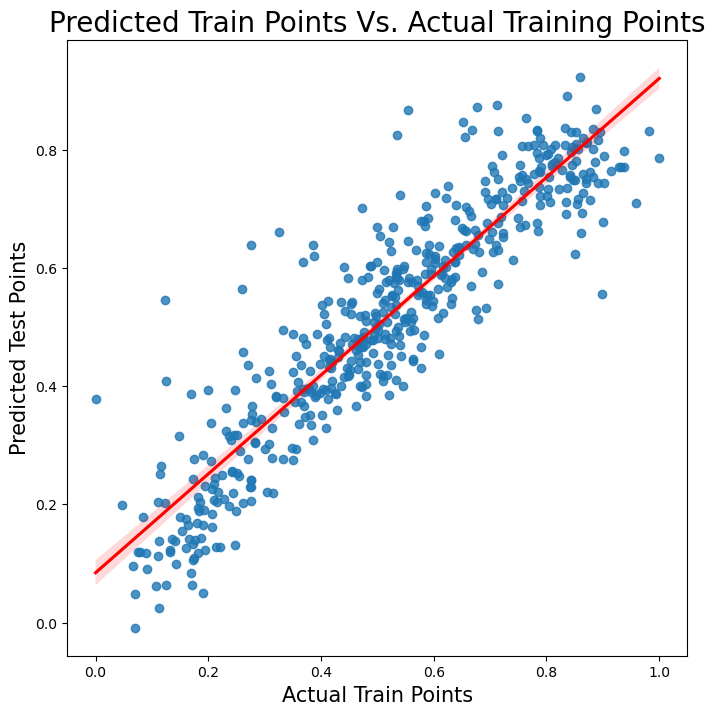

In [122]:
# Let's Visualize our y_train_pred and y_train using regplot graph.
plt.figure(figsize=(8, 8))
corr_plot = sns.regplot(x=y_train, y=y_train_pred, line_kws={'color': 'red'})
plt.title('Predicted Train Points Vs. Actual Training Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Train Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Test Points', fontdict={'fontsize': 15})
plt.show()

We can see that the equation of our best fitted line is:

$ Count = 0.162 + 0.235 \times year + 0.055 \times workingday + 0.478 \times temp -0.153 \times windspeed -0.075 \times season_spring + 0.041 \times season_summer + 0.078 \times season_winter -0.036 \times month_July + 0.062 \times month_September + 0.068 \times weekday_Saturday -0.275 \times weathersit_Light Snow  -0.082 \times weathersit_Mist + Cloudy $

#  Residual analysis (Proof for Linear Regrssion Assumptions)

After building model, we cannot finalise untill we proove the residual analysis wherein we check whether the distribution of Error is around 0 or not.

### Checking Normality of error terms

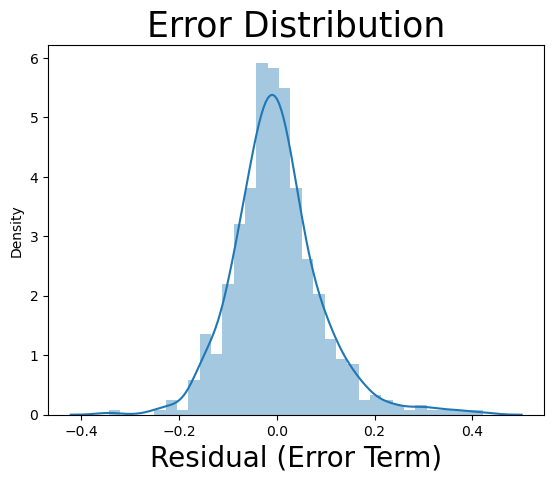

In [123]:
residual = y_train_pred - y_train
sns.distplot(residual)
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 20})
plt.title('Error Distribution', fontdict={'fontsize': 25})
plt.show()

### From the above graph it is clear that Error Distribution Is Normallly Distributed Across 0, which indicates that our model has handled the assumption of Error Normal Distribution properly.

### Checking Multi Colinearity

In [124]:
vif = Calculate_vif(X_train)

In [125]:
vif

,Features,VIF
2,temp,5.64
1,workingday,4.66
3,windspeed,4.63
4,season_spring,2.26
0,year,2.07
5,season_summer,1.96
9,weekday_Saturday,1.83
6,season_winter,1.78
11,weathersit_Mist + Cloudy,1.56
7,month_July,1.21


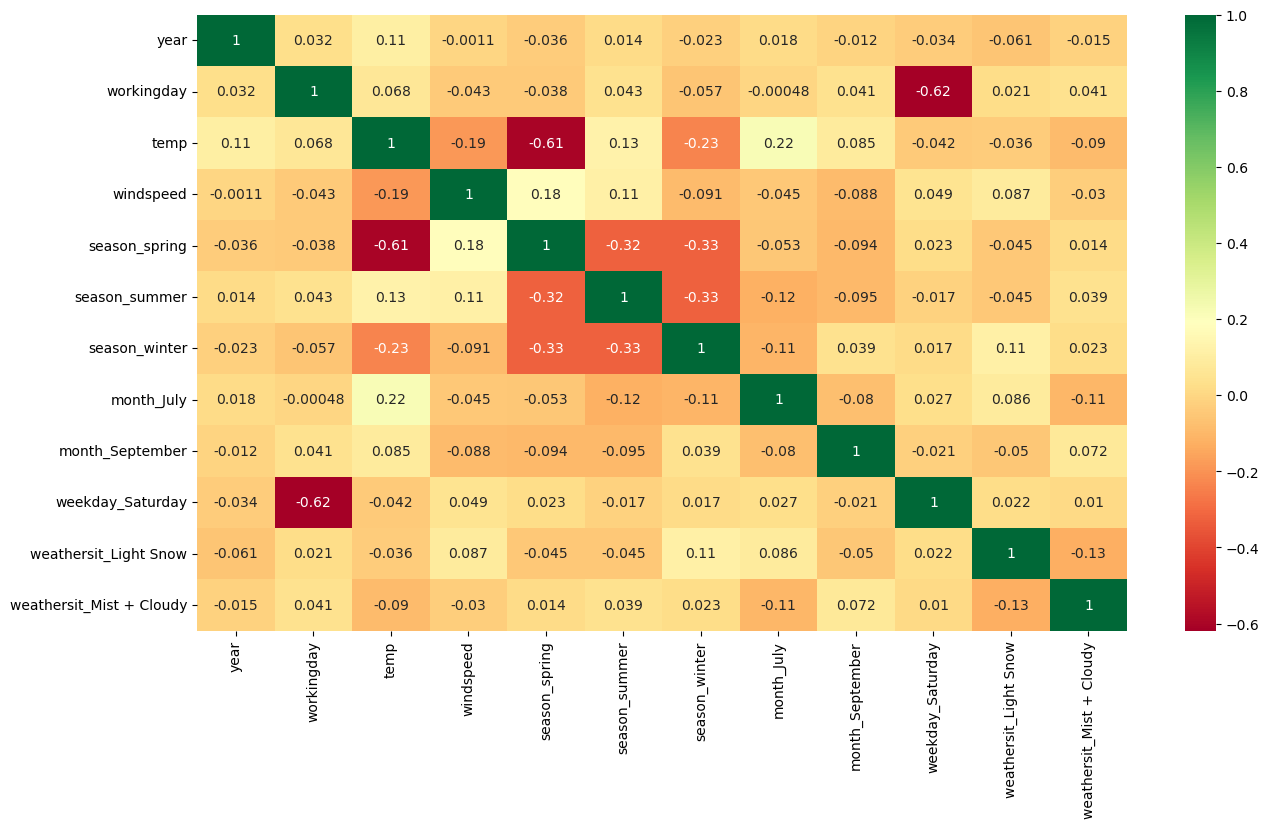

In [126]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train.corr(),annot = True, cmap="RdYlGn")
plt.show()

VIF values are less than 5 for all features except temp but we can not drop the temp feaure as we have already seen that teamp is one of the importent feature for our model.
And it is not creating any multicolinearity as seen from the heatmap..

# Predicting Test Data Using Developed Model

Now let's start predicting values for test set. But before we start the pridiction we have to drop the columns from the test data which we have already droped during model building.

In [127]:
# Before we Split data into X_test and y_test we have to Scale our bike_test data.
Scaler = MinMaxScaler()
bike_test[numerical_columns] = scaler.transform(bike_test[numerical_columns])

In [128]:
X_test = bike_test[list(X_train.columns)]
y_test = bike_test.pop('cnt')

In [129]:
X_test.head()

,year,workingday,temp,windspeed,season_spring,season_summer,season_winter,month_July,month_September,weekday_Saturday,weathersit_Light Snow,weathersit_Mist + Cloudy
184,0,0,0.831783,0.084219,0,0,0,0,0,0,0,1
535,1,1,0.901354,0.153728,0,1,0,0,0,0,0,0
299,0,1,0.511964,0.334206,0,0,1,0,0,0,0,1
221,0,1,0.881625,0.339570,0,0,0,0,0,0,0,0
152,0,1,0.817246,0.537414,0,1,0,0,0,0,0,0


In [130]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

### Now we have splited our **bike_test** data into X_test and y_test data. Let's add a constent to X_test and predict the values using our **lr_model17** model

In [131]:
# Let's add constent to our X_test data.
X_test_sm = sm.add_constant(X_test)

# Now Let's Predict the value of y_test_pred using X_test_sm

y_test_pred = lr_model17.predict(X_test_sm)

In [132]:
y_test_pred.head()

184    0.464713
535    0.899805
299    0.406189
221    0.586156
152    0.566159
dtype: float64

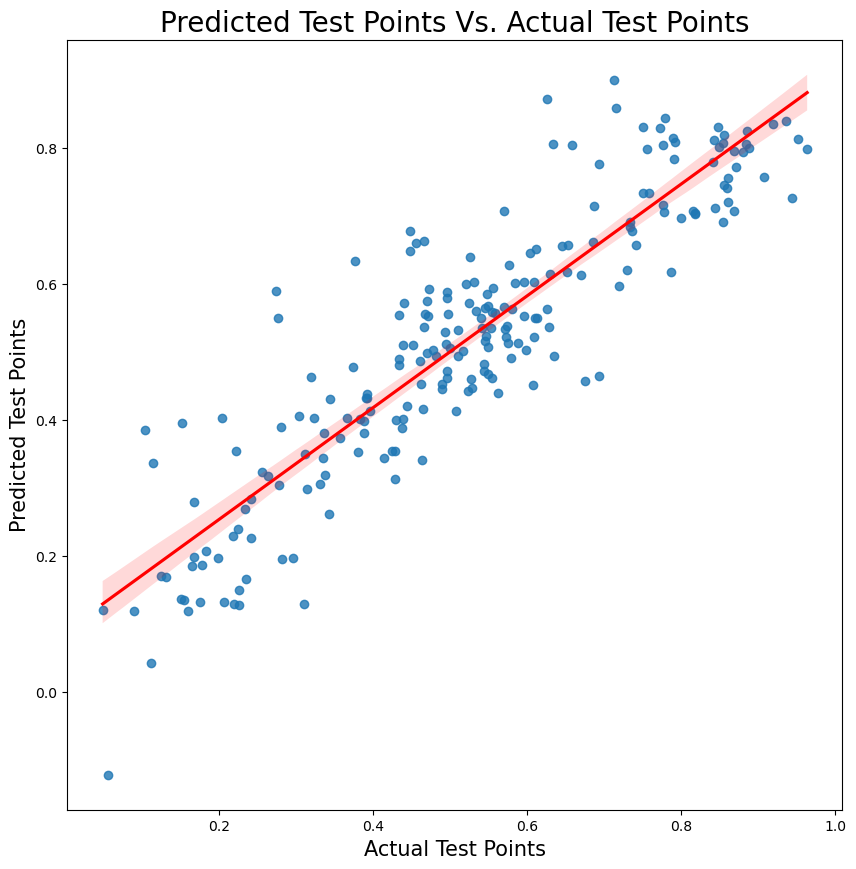

In [133]:
# Let's Visualize our y_test and y_test_pred using regplot graph.
plt.figure(figsize=(10, 10))
corr_plot = sns.regplot(x=y_test, y=y_test_pred, line_kws={'color': 'red'})
plt.title('Predicted Test Points Vs. Actual Test Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Test Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Test Points', fontdict={'fontsize': 15})
plt.show()

### Above Scatter Plot Shows Linear Relationship between Actual Test Data Points & Predicted Test Data Points

# Calculatinng R-Square

We have predicted values for the Train and Test set. Now let's generate r2_score for both the set.

In [134]:
# First let's  generate r2_score for Train data.
r2_score(y_train, y_train_pred)

0.83590223696607

In [135]:
# Now let's  generate r2_score for Test data.
r2 = r2_score(y_test, y_test_pred)
print(r2)

0.8032584494793834


### Calculate Adj R_square

In [136]:
adj_r2 = 1-(1-r2)*((bike_test.shape[0]-1)/(bike_test.shape[0]-12-1))

In [137]:
adj_r2

0.7917977766335222

# Conclusion :-

## R-squared is 83.5% on train set and 80.3% on test set
## Adjusted R-squared is 83.2% on train set and 79.1% on test set

#### The good predictors for the target variable were these 12 predictor variables:
- temp: tells about the temperature of the day
- workingday: tells if the day was a working day or not
- windspeed: tells about speed of the wind of the day
- season_spring: represents the spring season
- year
- weekday_Saturday: represents saturday
- month_July: represents July month
- weathersit_Mist + Cloudy: represents the weather situation
- month_September : represents the September month
- season_winter: represents the winter season
- season_summer: represents the October month
- weathersit_Light Snow: represents the snow